In [1]:
import os
import numpy as np
import cv2 as cv
import torch

from utils import split_xml_path,decoding_label,non_max_suppression,draw,get_person
from dataset import Dataset
from tqdm import tqdm
from torch.utils.data import DataLoader

LOAD_MODEL = True
MODEL_SAVE_PATH ='./model.pt'
LOAD_MODEL_FILE = './model.pt'
COMMON_PATH = '/media/sien/DATA/DATA/dataset/voc_data/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/for_detection'
IMG_DIR = COMMON_PATH + '/JPEGImages/'
LABEL_DIR = COMMON_PATH + '/Annotations/'
MODE = 'train'
train_path, val_path, test_path,sample_path = split_xml_path(LABEL_DIR)
sample_ds = Dataset(sample_path, IMG_DIR)


sample_loader = DataLoader(sample_ds, batch_size=1,shuffle=True)

211


In [15]:
x,y = next(iter(sample_loader))
x,y = x.to('cuda'),y.to('cuda')

In [16]:
boxes,class_list = decoding_label(np.array(y.cpu().detach().squeeze(0)))
boxes,class_list = non_max_suppression(boxes,0.5,0.3,class_list)
img = torch.permute(x.squeeze(0),(1,2,0))
img = np.array(img.cpu().detach())
img = np.array(img*255.0)
img = img.astype(np.uint8)
img = draw(boxes,img,class_list)



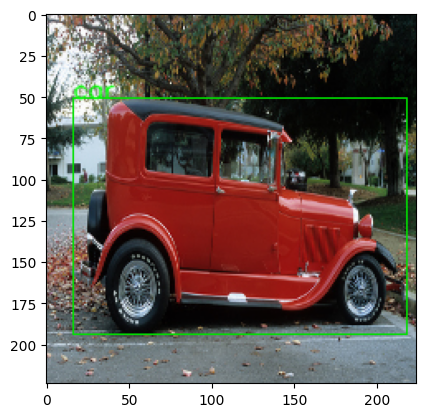

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()